In [8]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\stefa\OneDrive\Career Foundry\Chase Bank Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Database.csv'))

In [31]:
states = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'States.csv'))

In [32]:
states

,Year,Total,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,...,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Texas,Utah,Washington,Wisconsin,West Virginia
0,2010,17180660,17180660,58721470,6161474,3243127,9399370,412286,363738,44888766,...,98427081,11952225,1597965,3983483,0,59830101,5954434,8974182,5732417,1611641
1,2011,17577719,17577719,61966556,7578054,3352424,10985963,516394,362715,52698964,...,118292771,13144362,1612901,3973451,0,72582981,6105108,9274583,6759009,1571582
2,2012,19121416,19121416,68103326,7391542,3692880,13125177,643902,406328,63941080,...,142539596,14262459,1748042,4170053,0,77792627,3352714,9903056,7293133,1684628
3,2013,20794643,20794643,74895806,9092167,3878882,14865028,750800,422220,68787085,...,152363705,15206353,1867995,4330884,0,94307992,4013812,10800621,7899084,1730910
4,2014,21811720,21811720,83280266,7637151,4021330,16274273,1000660,485493,79619343,...,169162355,16192807,2128120,4693169,0,127587375,3743212,11828647,8466207,1742605
5,2015,23947232,23947232,91280985,7689847,4024108,17917152,1092668,560893,78046137,...,159250284,17578539,2126367,5136408,0,108632089,11529782,12970727,9358616,1752744
6,2016,26181633,26181633,103824272,8334593,4448267,19710979,1245175,653412,73966280,...,151385380,19068602,2306162,5825288,0,109526094,11963846,14659607,9410758,1812236


### Subsetting

In [64]:
year = states.loc[:,'Year':'Total']

In [65]:
year

,Year,Total
0,2010,17180660
1,2011,17577719
2,2012,19121416
3,2013,20794643
4,2014,21811720
5,2015,23947232
6,2016,26181633


In [81]:
year = year.set_index('Year')

KeyError: "None of ['Year'] are in the columns"

In [77]:
year

,Total
Year,
2010,17180660
2011,17577719
2012,19121416
2013,20794643
2014,21811720
2015,23947232
2016,26181633


Text(0, 0.5, 'Deposit in USD 10ths of Millions ($)')

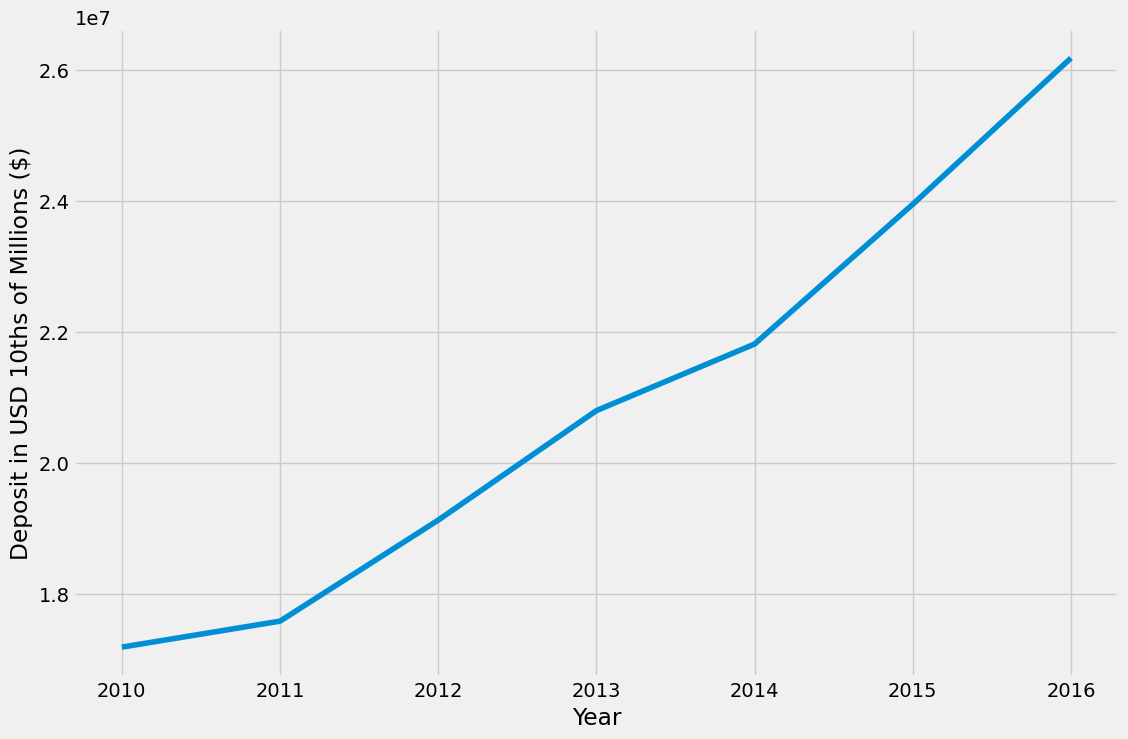

In [80]:
plt.figure(figsize=(12,8), dpi=100)
plt.plot(year)
plt.xlabel('Year') 
plt.ylabel('Deposit in USD 10ths of Millions ($)')

According to the graph above, we can see a increase in deposits through the years

In [82]:
# Check for missing values (you shouldn't have any)

year.isnull().sum() 

Total    0
dtype: int64

### Decomposition

In [87]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(year, model='additive',freq = 3)

In [88]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

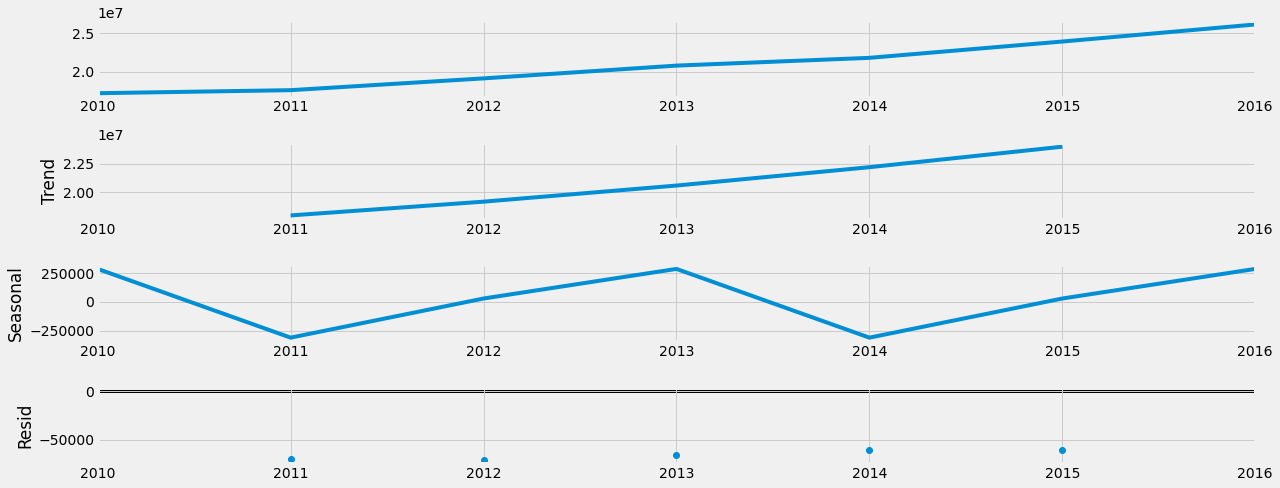

In [89]:
decomposition.plot()
plt.show()

According to the chart above, we can see that a trend and seasonality do exist in this graph. Seasonality seems to happen every 3 years.

### Stationarity using Dickey-Fuller Test

In [92]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(year['Total'])

Dickey-Fuller Stationarity test:
Test Statistic                 2.058963
p-value                        0.998745
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


According to the results above we see that the Test Statistic is larger than the critical values which means that we can't reject our null hypothesis. In essence, this means that the data is non-stationary.

### Autocorrelations

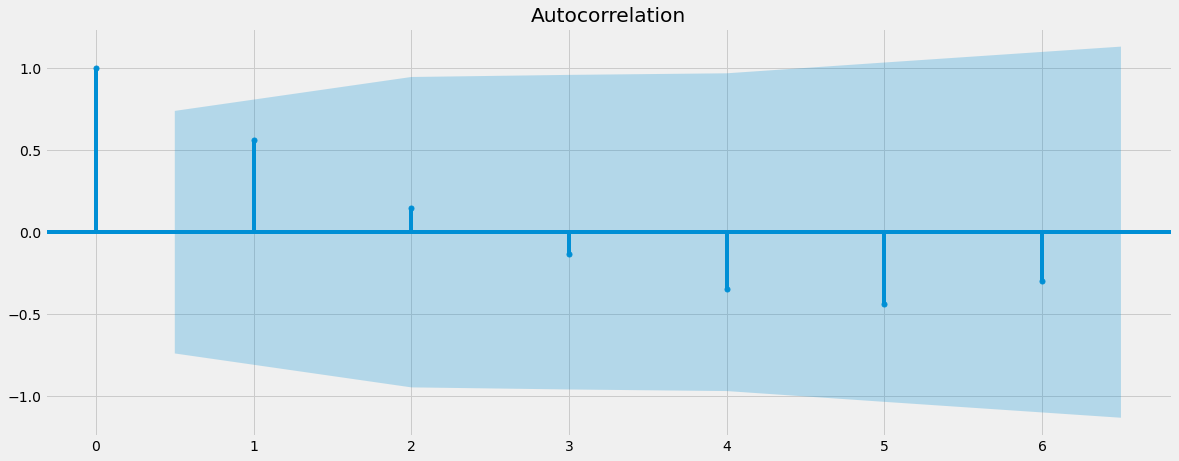

In [93]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(year)
plt.show()

### Differencing

In [107]:
data_diff = year - year.shift(1)

In [108]:
data_diff.dropna(inplace = True)

In [109]:
data_diff.head()

,Total
Year,
2011,397059.0
2012,1543697.0
2013,1673227.0
2014,1017077.0
2015,2135512.0


In [110]:
data_diff.columns

Index(['Total'], dtype='object')

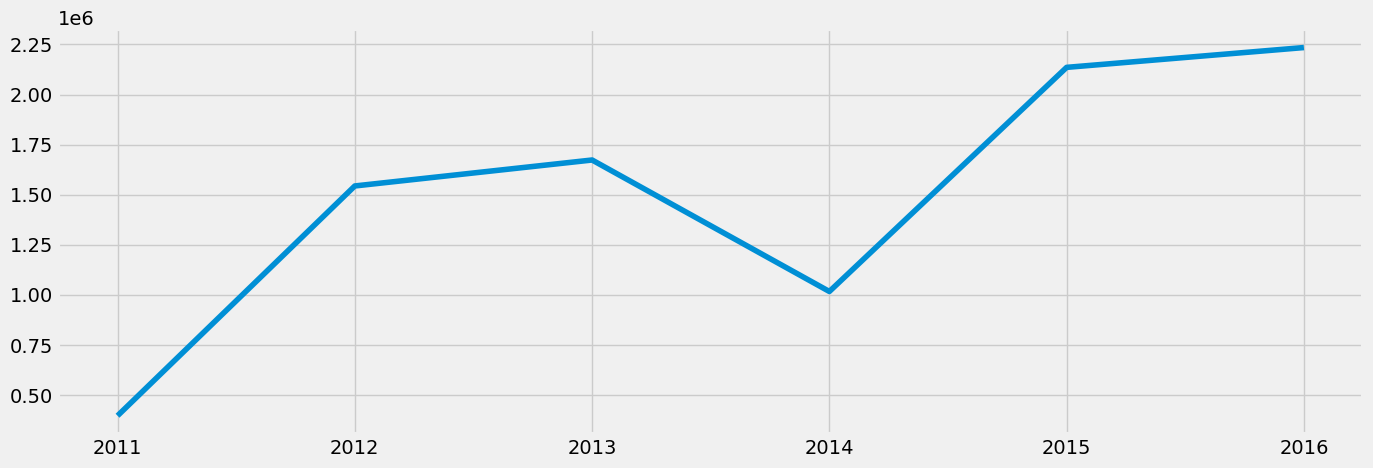

In [111]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [112]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.114455
p-value                        0.238742
Number of Lags Used            0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


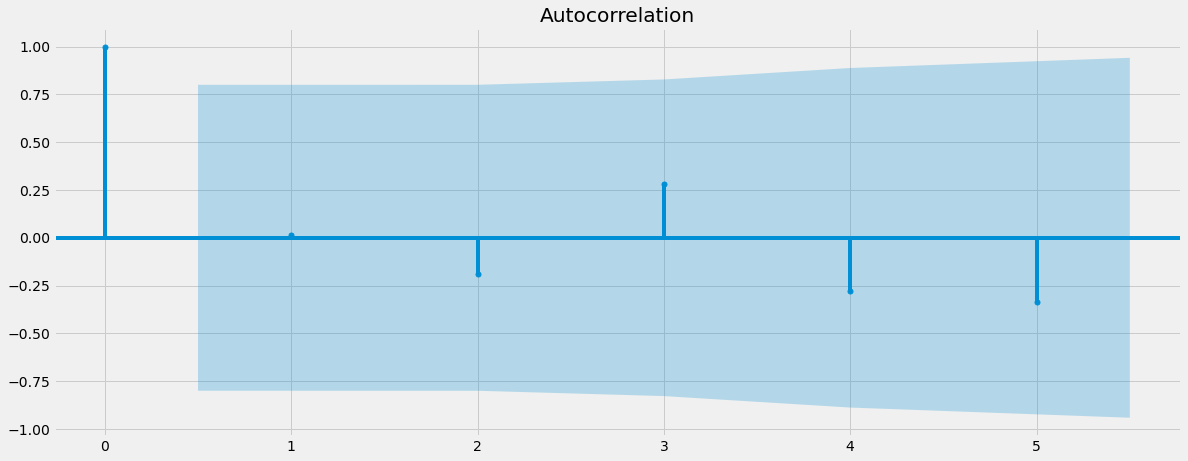

In [113]:
plot_acf(data_diff)
plt.show()

According to this, we will have to make another iteration so our Test Statistic is below the Critical Values. However, because there are less than ten significant lages above the confidence limit, we will not have to